In [1]:
import os, sys
path_to_package = os.path.abspath(os.path.join('../'))
if path_to_package not in sys.path:
    sys.path.append(path_to_package)


from src.io import get_filepaths, read_phylip_file
from src.models import data_preparation
from src.utils import get_filename

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

In [2]:
ORIGINAL_DATA_PATH = "/home/khaldrem/code/sc_regmod/dataset/original"

In [25]:
filepaths = get_filepaths(ORIGINAL_DATA_PATH)

In [ ]:
# Detectar si el archivo presenta simbolo -

def detect_symbol(data, symbol):
    for row in range(len(data)):
        if(symbol in data[row, :].seq):
            return True
    
    return False

count_symbol = 0
for fp in filepaths:
    data = read_phylip_file(fp)
    if detect_symbol(data, "-"):
        count_symbol += 1

In [26]:
# base freq for all filesas_integer_ratio
            if special:
            
            else:
                if(min > data.get_alignment_length())
                
        else:
            #All files

all_bases = {}
# filepaths = filepaths[:1]
for fp in filepaths:
    data = read_phylip_file(fp)
    bases = {}
    for row in range(len(data)):
        unique_bases_row = set(data[row, :].seq)
        for key in unique_bases_row:
            if key not in bases.keys():
                bases[key] = 0
            
            freq = str(data[row, :].seq).count(key)
            bases[key] += freq
    
    for key in bases:
        if key not in all_bases.keys():
            all_bases[key] = 0
        
        all_bases[key] += bases[key]

    # print(f"file: {get_filename(fp)} -> max_data: {data.get_alignment_length() * 1011}")

print(all_bases)



{'a': 2847459970, 't': 2429202202, 'g': 1794394936, 'c': 1667812477, 'r': 2638378, 'y': 2707368, 's': 380937, 'w': 463077, 'm': 433836, 'k': 356213, '-': 185376167}


In [33]:
total = 0
for key in all_bases:
    total += all_bases[key]

for key in all_bases:
    print(f"key: {key} -> {round(all_bases[key]/total,5)}")

key: a -> 0.31882
key: t -> 0.27199
key: g -> 0.20091
key: c -> 0.18674
key: r -> 0.0003
key: y -> 0.0003
key: s -> 4e-05
key: w -> 5e-05
key: m -> 5e-05
key: k -> 4e-05
key: - -> 0.02076


In [28]:
print(total)

8931225561


{
    'a': 2847459970, 
    't': 2429202202, 
    'g': 1794394936, 
    'c': 1667812477, 
    'r': 2638378, 
    'y': 2707368, 
    's': 380937, 
    'w': 463077, 
    'm': 433836, 
    'k': 356213, 
    '-': 185376167
}

In [2]:
# Chequear cuantos archivos fueron removidos en el proceso 1

original_fps = get_filepaths('/home/khaldrem/code/sc_regmod/dataset/original')
clean_fps = get_filepaths('/home/khaldrem/code/sc_regmod/dataset/clean')

In [3]:
print(f"Cantidad de archivos original: {len(original_fps)}")
print(f"Cantidad de archivos clean   : {len(clean_fps)}")
print(len(original_fps)- len(clean_fps))

Cantidad de archivos original: 6015
Cantidad de archivos clean   : 5977
38


In [4]:
df_files = {}

filenames = []
original_length = []
clean_length = []

for f in original_fps:
    data = read_phylip_file(f)
    filename = get_filename(f)

    filenames.append(filename)
    original_length.append(data.get_alignment_length())

    clean_path = f"/home/khaldrem/code/sc_regmod/dataset/clean/{filename}.phylip"
    if os.path.exists(clean_path):
        data2 = read_phylip_file(clean_path)
        clean_length.append(data2.get_alignment_length())
    else:
        clean_length.append(-1)


df_files["filenames"] = filenames
df_files["Original"] = original_length
df_files["Proceso_1"] = clean_length


print(len(original_length))
print(len(clean_length))

df_len = pd.DataFrame.from_dict(df_files)

6015
6015


In [5]:
df_len.loc[df_len['Proceso_1']!= -1, 'percentage'] = 1 - (df_len["Proceso_1"]/df_len["Original"])

In [9]:
sorted_df = df_len.sort_values(by="percentage", ascending=False)
sorted_df['index'] = range(1, len(sorted_df) + 1)
sorted_df.head(25).to_csv("archivos_mas_cambiaron.csv")

In [11]:
import matplotlib

print(f"mean: {df_len['Original'].mean()}")
print(f"std: {df_len['Original'].std()}")
print(f"var: {df_len['Original'].var()}")
print()
print(f"mean: {df_len['Proceso_1'].mean()}")
print(f"std: {df_len['Proceso_1'].std()}")
print(f"var: {df_len['Proceso_1'].var()}")



df_len.head()


mean: 1468.6701579384871
std: 1132.1291967159752
var: 1281716.5180567594

mean: 220.27946799667498
std: 264.94544155237764
var: 70196.08699938437


,filenames,Original,Proceso_1
0,YNR029C,1290,161
1,YOR059C,1353,176
2,YJR062C,1375,194
3,YJL123C,1565,363
4,YJL203W,843,122


Text(0, 0.5, 'Largo de las secuencias')

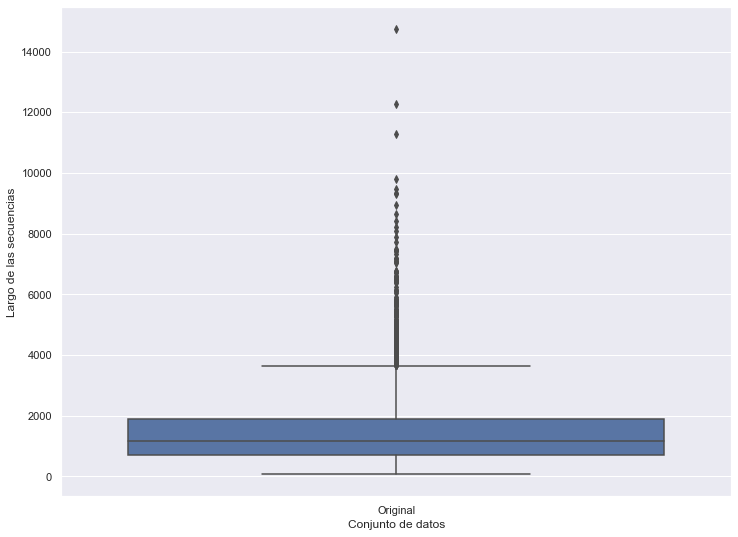

In [15]:
#Original
sns.set(rc={'figure.figsize':(12,9)})

pt = df_len[["Original"]]
b = sns.boxplot(data=pt)
# patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=t) for i,t in enumerate(t.get_text() for t in b.get_xticklabels())]
# plt.legend(handles=patches, loc="upper left") 

plt.xlabel("Conjunto de datos")
plt.ylabel("Largo de las secuencias")

Text(0, 0.5, 'Largo de las secuencias')

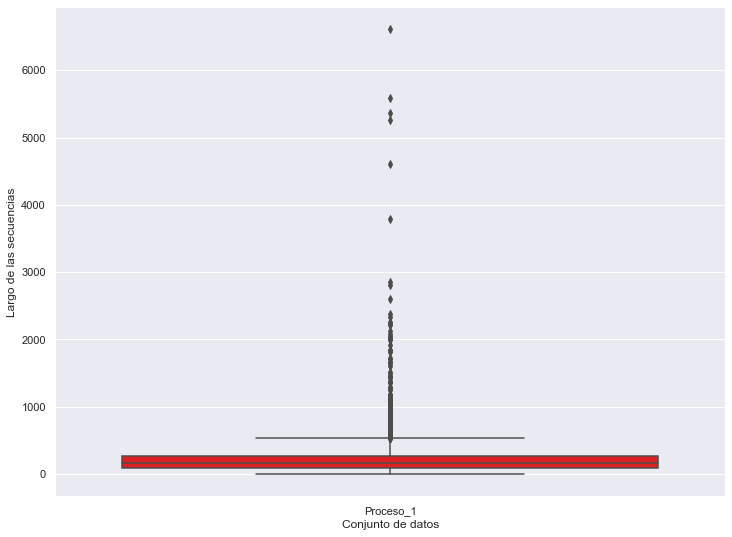

In [24]:
#Original
sns.set(rc={'figure.figsize':(12,9)})


pt = df_len[df_len["Proceso_1"] != -1]
pt = pt[["Proceso_1"]]
b = sns.boxplot(data=pt, color="red")
# patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=t) for i,t in enumerate(t.get_text() for t in b.get_xticklabels())]
# plt.legend(handles=patches, loc="upper left") 

plt.xlabel("Conjunto de datos")
plt.ylabel("Largo de las secuencias")

In [25]:
#ARCHIVOS ANOVA EXP_2

anova_fps = get_filepaths("/home/khaldrem/code/sc_regmod/dataset/anova/anova_at_least_one_phenotype/p_value_0_01/haploide-euploide")

In [32]:
anova_data_len = []
for f in anova_fps:
    data = read_phylip_file(f)
    anova_data_len.append(data.get_alignment_length())


anova_dict = {
    "Anova": anova_data_len
}

print("proceso 2")
print(f"mean: {np.mean(anova_data_len)}")
print(f"std: {np.std(anova_data_len)}")
print(f"var: {np.var(anova_data_len)}")

proceso 2
mean: 17.249914994899694
std: 21.970919177862033
var: 482.7212895201457


Text(0, 0.5, 'Largo de las secuencias')

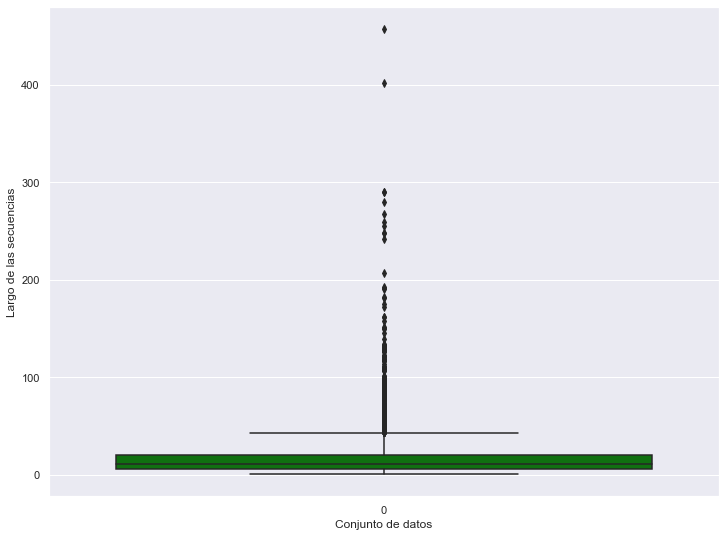

In [34]:
#ANOVA at_least_one p-value: 0.01
sns.set(rc={'figure.figsize':(12,9)})

b = sns.boxplot(data=anova_dict["Anova"], color="green")
# patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=t) for i,t in enumerate(t.get_text() for t in b.get_xticklabels())]
# plt.legend(handles=patches, loc="upper left") 

plt.xlabel("Conjunto de datos")
plt.ylabel("Largo de las secuencias")